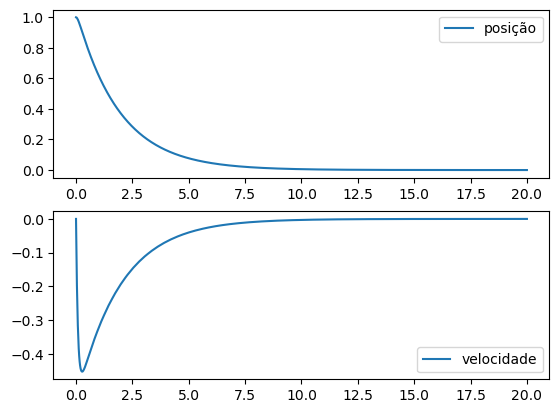

In [ ]:
'''
Define a equação do oscilador harmônico e um array com os tempos para
serem utilizados nos parâmetros da função solve_ivp.

O solve_ivp retorna um array com os tempos requisitados, outro com valores
da posição, e um último com os valores da velocidade. Para acessar separadamente os 
arrays, utiliza-se .t(array com tempos), .y(array com os valores do vetor, tanto posição quanto velocidade).
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

y0 = np.array([1, 0])

def oh(t, y, w, b):
  f = np.array([y[1], - w*y[0] - b*y[1]])
  return f

tempo = np.linspace(0, 20, 1000)
Y = solve_ivp(oh, [0, tempo[-1]], y0, t_eval=tempo, args=(2*np.pi, 4*np.pi)) # para plotar o amortecimento crítico, b = 4*pi

plt.subplot(211)
plt.plot(Y.t, Y.y[0], label='posição')
plt.legend()

plt.subplot(212)
plt.plot(Y.t, Y.y[1], label='velocidade')
plt.legend()

plt.show()

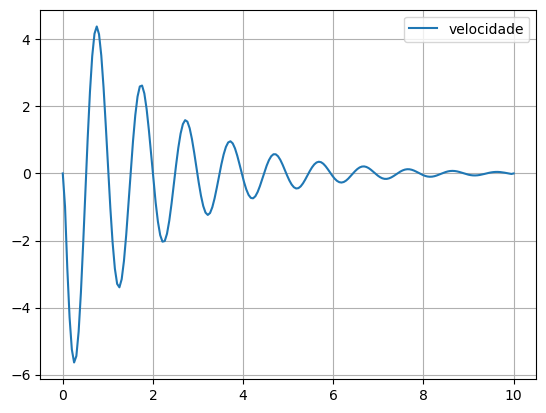

In [1]:
'''
Método de Verlet
'''
import numpy as np
import matplotlib.pyplot as plt

tempo = np.linspace(0, 10, 200)
dt = tempo[1] - tempo[0]
x = np.ones(len(tempo))
v = np.zeros(len(tempo))
v0 = 0
x0 = 1
w = 2*np.pi
b = 1

def a(x, v, w, b):
  f = -(w**2)*x - b*v
  return f

x[1] = x0 + v0*dt + 0.5*a(x0, v0, w, b)*dt**2

for i in range(1, len(tempo)-1):
  v[i] = (x[i] - x[i-1])/dt
  x[i+1] = 2*x[i] - x[i-1] + a(x[i], v[i], w, b)*(dt**2)

#plt.plot(tempo, x, label='posição')
plt.plot(tempo, v, label='velocidade')
plt.legend()
plt.grid()
plt.show()